# Simple order analysis

In [3]:
#import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing the coded training set
from olistdash.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True) 

## 1 - Inspecting features

In [5]:
orders.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037


In [6]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000
mean,12.555259,23.744247,0.772981,0.588977,0.100596,4.142005,1.142699,1.013965,136.935472,22.773011,601.058677
std,9.540464,8.769554,4.748411,0.492022,0.300794,1.296748,0.540518,0.123792,208.935017,21.553810,595.216682
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000,0.000000
25%,6.764236,18.330069,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.830000,187.358391
50%,10.215972,23.232187,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000,434.070859
75%,15.719502,28.417963,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.000000,797.860262
max,209.628611,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000,8736.947618


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96525 entries, 0 to 96532
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  96525 non-null  object 
 1   wait_time                 96525 non-null  float64
 2   expected_wait_time        96525 non-null  float64
 3   delay_vs_expected         96525 non-null  float64
 4   order_status              96525 non-null  object 
 5   dim_is_five_star          96525 non-null  int64  
 6   dim_is_one_star           96525 non-null  int64  
 7   review_score              96525 non-null  int64  
 8   number_of_products        96525 non-null  int64  
 9   number_of_sellers         96525 non-null  int64  
 10  price                     96525 non-null  float64
 11  freight_value             96525 non-null  float64
 12  distance_seller_customer  96525 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 10.3+ MB


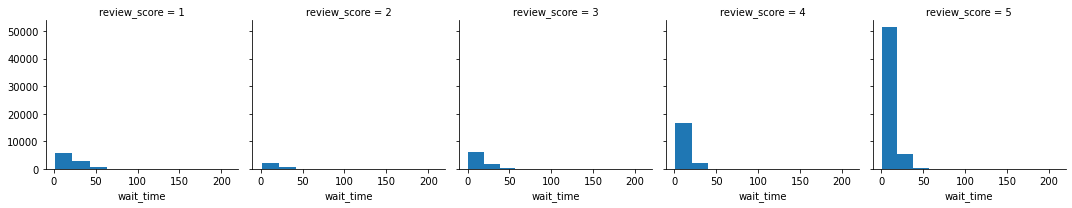

In [8]:
# Ploting distribution for variables available in the dataset
g = sns.FacetGrid(data=orders, col="review_score")
g.map(plt.hist, "wait_time")

<AxesSubplot:xlabel='price', ylabel='Density'>

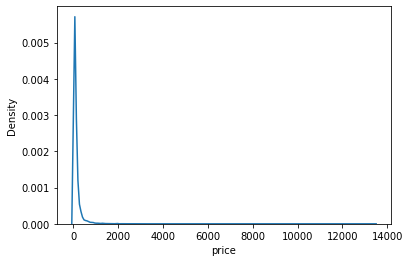

In [9]:
sns.kdeplot(orders['price'])

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

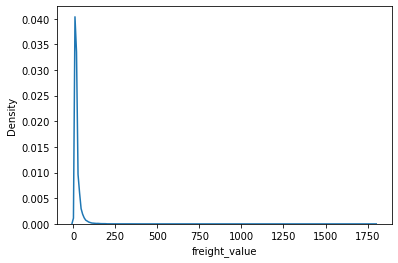

In [10]:
sns.kdeplot(orders['freight_value'])

<AxesSubplot:xlabel='distance_seller_customer', ylabel='Density'>

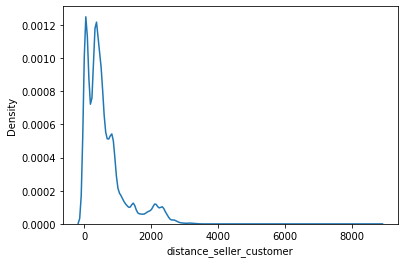

In [11]:
sns.kdeplot(orders['distance_seller_customer'])

---
## ❓ Inspecting the varius correlations between features. Lookig for the ones related with `review_score`.

<AxesSubplot:>

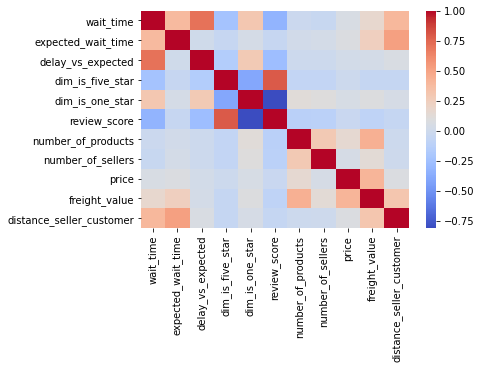

In [12]:
# Correlation plot
sns.heatmap(orders.corr(), cmap='coolwarm')

💡 `wait_time` is the more correlated feature `review_score`. Negativ Correlation (Bigger wait time less Sore in review). The second feature with bigger correlation (also negative) is `delay_vs_spected`

## 2 - Simple regression of `review_score` against delivery duration

It seems that `review_score` is mostly correlated with `wait_time` (r = 33%) and `delay_vs_expected` (r=27%).
Investigation with seaborn

## 2.1 Plots

#### - Reducing dataframe to a random subsample of 10,000 rows for speed purposes in data exploration.
#### - using `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed.

In [13]:
sample = orders.sample(10000, random_state=42)

- Using `sns.regplot()` to plot the regression line
- Adding some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

(0.0, 5.874758166769115)

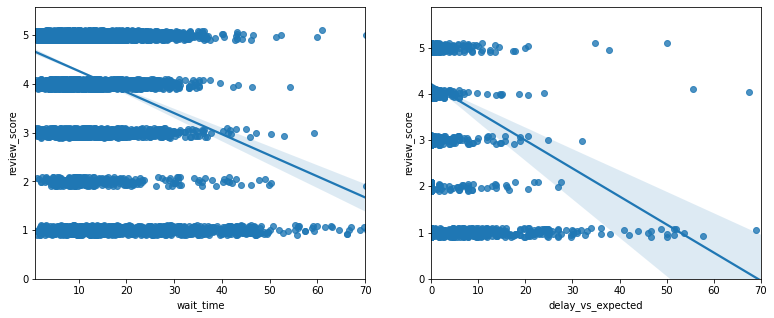

In [14]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
sns.regplot(x=sample.wait_time, y=sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1, 2, 2)
sns.regplot(x=sample.delay_vs_expected, y=sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

### 2.2 Interpretation

- Slope wait_time = -0.05 : "For each additional day an order takes to deliver, the review_score on average is reduced by 0.05"
- Slope delay = -0.1 : "For each additional day an order takes to deliver _above expected_, the review_score on average is reduced by 0.1"

### 2.3 Inferential analysis

Even if we used all 100,000 orders for these regplots, they only represent 16 months of data after all.

**How certain** are we that these coefficients are **statistically significant**? i.e that they do not capture random fluctuations due to the limited observation period, and would not generalize well to future orders (all else being equal)?

We need to estimate the **confidence interval** around the mean value for these slopes  
slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]}  
slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]}

Seaborn computes this 95% confidence interval for us with a shaded blue cone around the regression line.

❓Using seaborn `regplot` to visualize the two confidence intervals:
- Changing the size of the sample by sub-sampling the dataset: Notice how the slope may change as the sample size becomes smaller. What about the confidence interval?
- Changing the size of the confidence interval by playing with regplot `ci` parameter (95% by default)

Text(0.5, 1.0, 'Full dataset (100000 datapoints), Confidence Interval 99%')

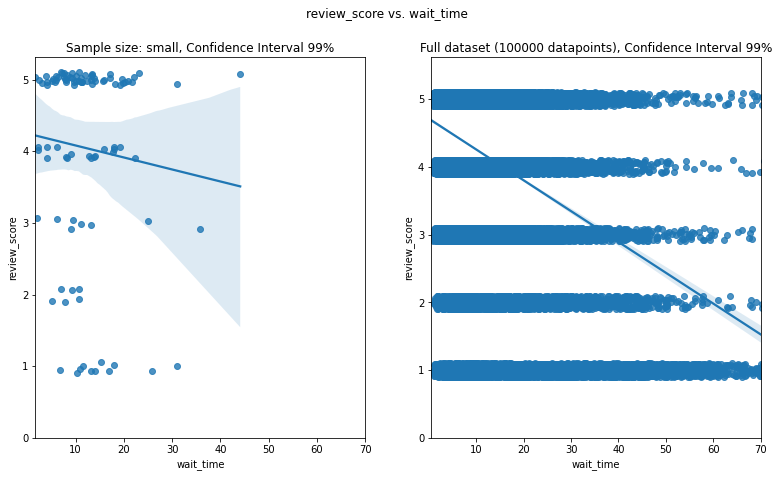

In [15]:
sample = orders.sample(100, random_state=42)
plt.figure(figsize=(13, 7))
plt.suptitle('review_score vs. wait_time')

plt.subplot(1, 2, 1)
sns.regplot(x=sample.wait_time, y=sample.review_score, y_jitter=.1, ci=99)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Sample size: small, Confidence Interval 99%")

plt.subplot(1, 2, 2)
sns.regplot(x=orders.wait_time, y=orders.review_score, y_jitter=.1, ci=99)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Full dataset (100000 datapoints), Confidence Interval 99%")

## Interpretation

When plotting all the datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
- We are 95% confident that slower deliveries are associated with weaker reviews.
- The `p-value` associated with the null-hypothesis "review_score is not related to delivery duration" is close to 0, and we can safely reject this hypothesis

$\implies$ Our findings are said to be **statistically significant**. 

However, **correlation does not imply causality**. It may well be that some products, which happen to be inherently slow to deliver on average (heavy ones maybe?) also happen to have a consistently low review_score, however long they take to be delivered. Identifying these **confounding factor** is crucial and cannot be done with simple univariate regression.